# Day 5 – Image Classification Project

## Objective
The objective of this task is to build an image classification model using both
traditional machine learning and deep learning techniques.

## Dataset
The MNIST handwritten digits dataset was used, which consists of grayscale images
of digits (0–9) with a size of 28×28 pixels.

## Approach
1. Loaded and explored the MNIST dataset.
2. Normalized image pixel values for better model performance.
3. Visualized sample images with their labels.
4. Built a Logistic Regression model as a traditional ML approach.
5. Built a Convolutional Neural Network (CNN) using TensorFlow for deep learning.
6. Evaluated and compared both models using accuracy metrics.

## Results
- Logistic Regression Accuracy: **92.59%**
- CNN Validation Accuracy: **98.69%**

The CNN model significantly outperformed the traditional machine learning model
by effectively learning spatial features from image data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [3]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

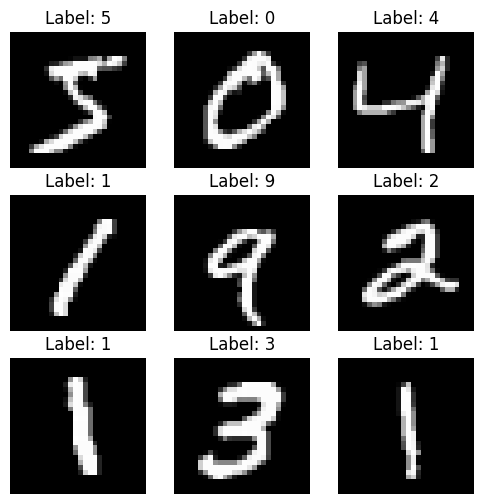

In [4]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)

y_pred = lr_model.predict(X_test_flat)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9259


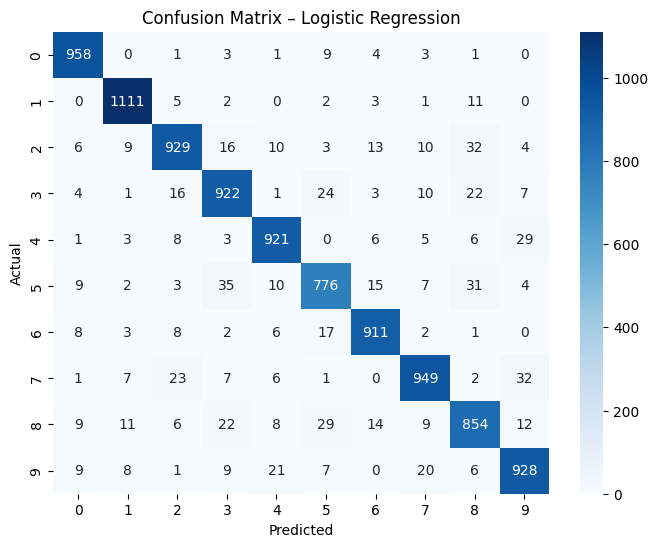

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape for CNN
X_train_cnn = X_train_norm.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_norm.reshape(-1, 28, 28, 1)

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_cnn, y_train,
    epochs=5,
    validation_data=(X_test_cnn, y_test)
)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9540 - loss: 0.1560 - val_accuracy: 0.9716 - val_loss: 0.0836
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9814 - val_loss: 0.0530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9886 - loss: 0.0345 - val_accuracy: 0.9868 - val_loss: 0.0400
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9851 - val_loss: 0.0453
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9869 - val_loss: 0.0414


In [8]:
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print("CNN Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9869 - loss: 0.0414
CNN Test Accuracy: 0.9868999719619751


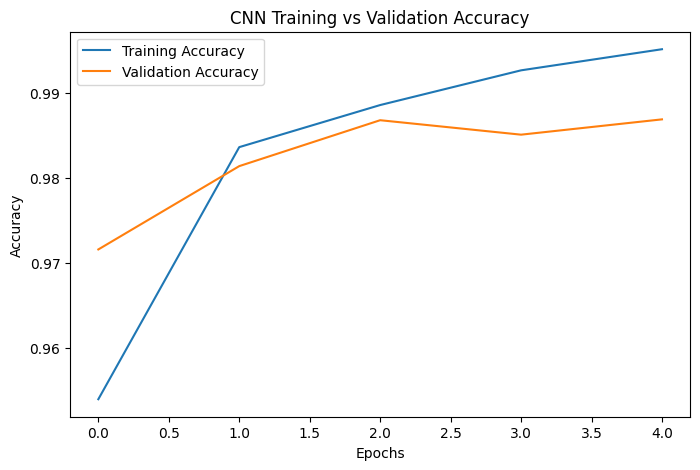

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.legend()
plt.show()

### Model Performance Summary

- Logistic Regression Accuracy: **92.59%**
- CNN Test Accuracy: **~98.7%**

The Convolutional Neural Network significantly outperformed the traditional
Logistic Regression model by learning spatial features from images, resulting
in much higher classification accuracy.